# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def calculate_autocovariance(X, max_lag):
    mean_X = np.mean(X)
    autocovariance_values = []

    T = len(X)

    for lag in range(max_lag):
        autocov = 0
        for t in range(T - lag):
            autocov += (X[t] - mean_X) * (X[t + lag] - mean_X)
        autocov /= (T - lag)
        autocovariance_values.append(autocov)

    return autocovariance_values

# Solutions

I - White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)

1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.


First, we define the white noise function:

In [3]:
# define White Noise
def generate_data_White_noise(T,mu,sigma):
    X = np.random.normal(loc=0, scale=np.sqrt(sigma), size=T)
    return X

According to the formulas, we can obtain the empirical mean and plot for the aotocovariance.

theoretical_mean =  0
empirical_mean =  0.02662369262339071


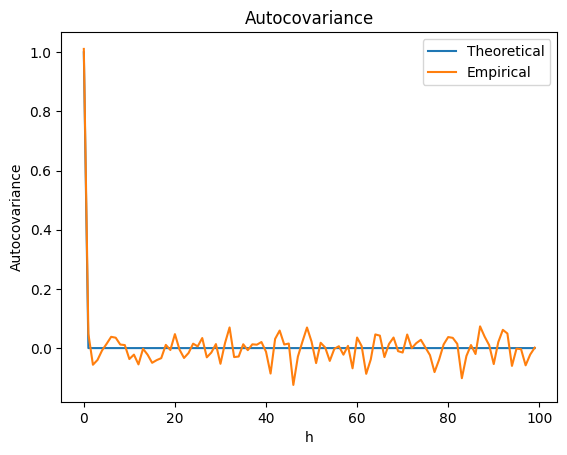

In [4]:
# parameters
T = 1000
h = 100 # lag
mu, sigma = 0, 1

Zt = generate_data_White_noise(T,mu,sigma)
theoretical_mean = 0
theoretical_autocovariance = [sigma**2 if lag == 0 else 0 for lag in range(h)]

empirical_mean = np.mean(Zt)
empirical_autocovariance = calculate_autocovariance(Zt, h)

print("theoretical_mean = ",theoretical_mean)
print("empirical_mean = ",empirical_mean)

plt.plot(theoretical_autocovariance, label='Theoretical')
plt.plot(empirical_autocovariance, label='Empirical')
plt.legend()
plt.xlabel('h')
plt.ylabel('Autocovariance')
plt.title("Autocovariance")
plt.show()

Run 100 times to plot the emprical means, we find that all the emprical means are very close to theoretical mean.

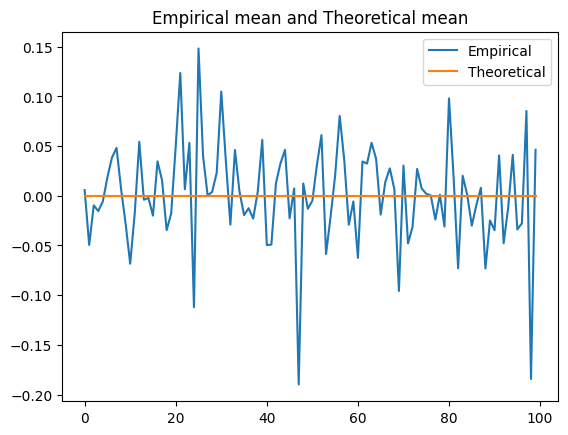

In [5]:
empirical_times = 100
empirical_means = []
for i in range(empirical_times):
    T = np.random.randint(100,1000)
    Zt = generate_data_White_noise(T,mu,sigma)
    empirical_means.append(np.mean(Zt))
    
plt.plot(empirical_means, label='Empirical')
plt.plot([theoretical_mean]*empirical_times, label='Theoretical')
plt.title("Empirical mean and Theoretical mean")
plt.legend()
plt.show()

4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.

According to the boxplot, we find that the error is going to be smaller with the larger value of T, which means more times for empircal calculations could less the error.

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_45358/3748146015.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gamma = np.sum((theoretical_autocovariance[item] - empirical_autocovariance[item])**2 for item in range(len(theoretical_autocovariance)))


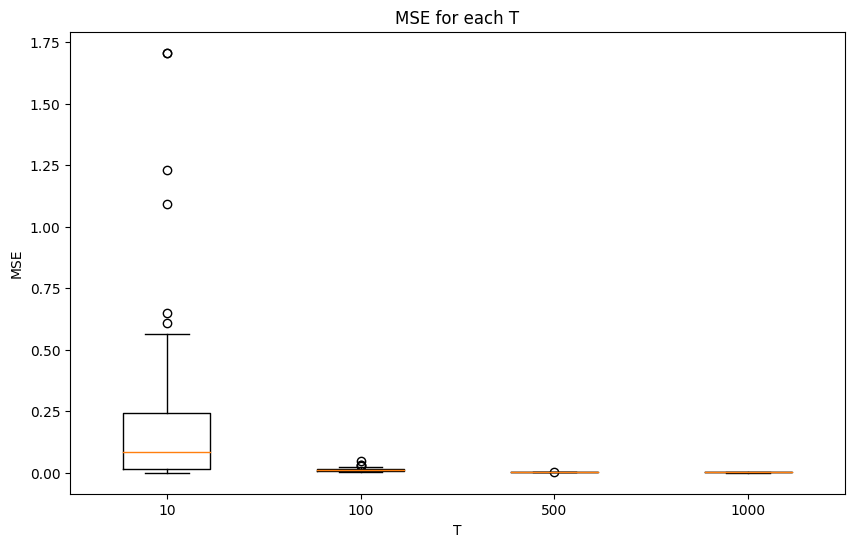

In [6]:
T_values = [10, 100, 500, 1000]
h_values = [1, 10, 50, 100]
num_draws = 100

mse_autocovariance = []

for idx in range(4):
    mse_draws = []  # Store MSE for each draw
    T = T_values[idx]
    h = h_values[idx]
    theoretical_autocovariance = [sigma**2 if lag == 0 else 0 for lag in range(h)]

    for _ in range(num_draws):
        X = generate_data_White_noise(T,mu,sigma) 
        empirical_autocovariance = calculate_autocovariance(X,h)
        gamma = np.sum((theoretical_autocovariance[item] - empirical_autocovariance[item])**2 for item in range(len(theoretical_autocovariance)))
        mse = gamma/len(theoretical_autocovariance)
        mse_draws.append(mse)

    mse_autocovariance.append(mse_draws)
# plot boxplot for each T
plt.figure(figsize=(10, 6))
plt.boxplot(mse_autocovariance)
plt.xticks([1, 2, 3, 4], T_values)
plt.title("MSE for each T")
plt.xlabel("T")
plt.ylabel("MSE")
plt.show()

II $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$

1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.

In [7]:
def generate_data_Xt(T, mu, sigma, a, b):
    noise = generate_data_White_noise(T, mu, sigma)
    X = []
    for i in range(1,T):
        X.append(a + b * noise[i] + noise[i-1])
    return X

theoretical_mean =  1
empirical_mean =  1.0217994293509791


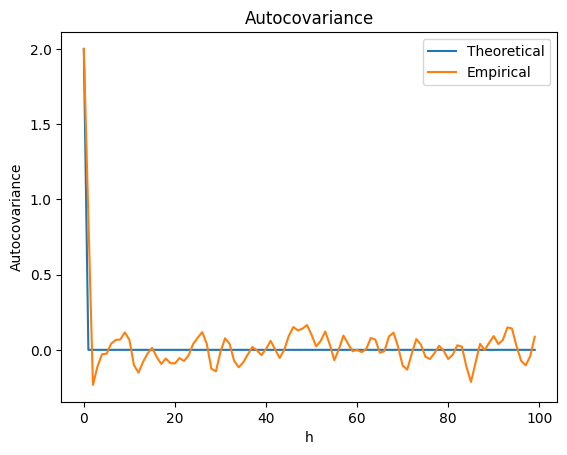

In [8]:
T = 1000
h = 100 # lag
mu, sigma = 0, 1
a, b = 1, 1

Xt = generate_data_Xt(T, mu, sigma, a, b)

theoretical_mean = a + b*mu
theoretical_autocovariance = [(1+(b**2))*(sigma**2) if lag == 0 else 0 for lag in range(h)]

empirical_mean = np.mean(Xt)
empirical_autocovariance = calculate_autocovariance(Xt, h)

print("theoretical_mean = ",theoretical_mean)
print("empirical_mean = ",empirical_mean)

plt.plot(theoretical_autocovariance, label='Theoretical')
plt.plot(empirical_autocovariance, label='Empirical')
plt.legend()
plt.xlabel('h')
plt.ylabel('Autocovariance')
plt.title("Autocovariance")
plt.show()

Run 100 times to plot the emprical means, we find that all the emprical means are very close to theoretical mean.

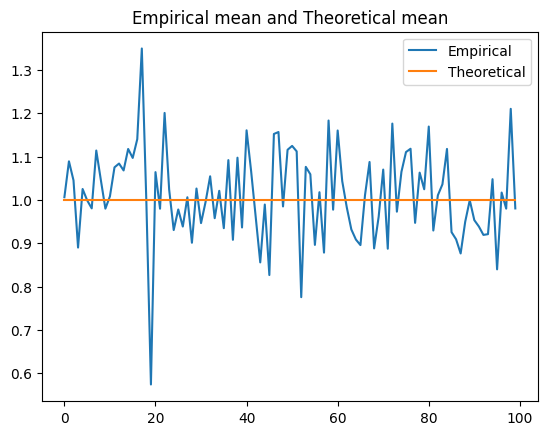

In [9]:
empirical_times = 100
empirical_means = []
for i in range(empirical_times):
    T = np.random.randint(100,1000)
    Xt = generate_data_Xt(T, mu, sigma, a, b)
    empirical_means.append(np.mean(Xt))
    
plt.plot(empirical_means, label='Empirical')
plt.plot([theoretical_mean]*empirical_times, label='Theoretical')
plt.title("Empirical mean and Theoretical mean")
plt.legend()
plt.show()

4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.

According to the boxplot, we find that the error is going to be smaller with the larger value of T, which means more times for empircal calculations could less the error.

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_45358/2127113208.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gamma = np.sum((theoretical_autocovariance[item] - empirical_autocovariance[item])**2 for item in range(len(theoretical_autocovariance)))


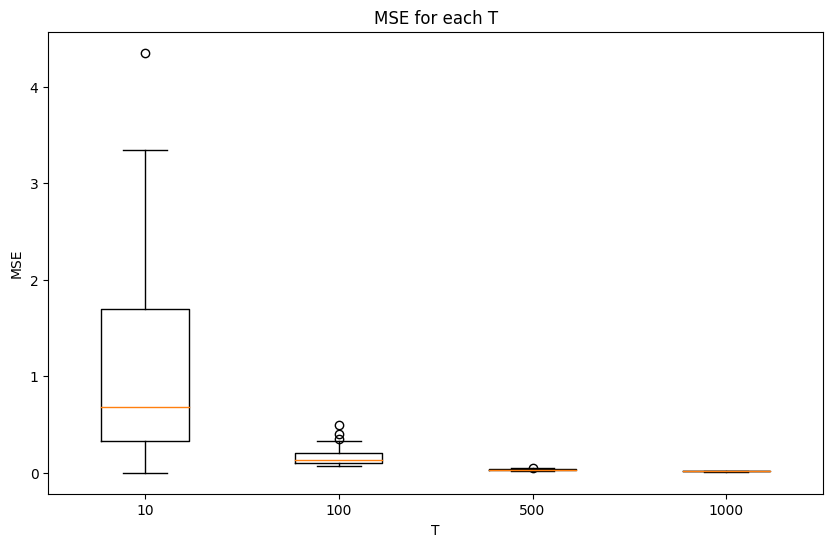

In [10]:
T_values = [10, 100, 500, 1000]
h_values = [1, 10, 50, 100]
num_draws = 100

mse_autocovariance = []

for idx in range(4):
    mse_draws = []
    T = T_values[idx]
    h = h_values[idx]
    theoretical_autocovariance = [(1+(b**2))*(sigma**2) if lag == 0 else 0 for lag in range(h)]

    for _ in range(num_draws):
        X = generate_data_Xt(T, mu, sigma, a, b)
        empirical_autocovariance = calculate_autocovariance(X,h)
        gamma = np.sum((theoretical_autocovariance[item] - empirical_autocovariance[item])**2 for item in range(len(theoretical_autocovariance)))
        mse = gamma/len(theoretical_autocovariance)
        mse_draws.append(mse)

    mse_autocovariance.append(mse_draws)

# plot boxplot for each T
plt.figure(figsize=(10, 6))
plt.boxplot(mse_autocovariance)
plt.xticks([1, 2, 3, 4], T_values)
plt.title("MSE for each T")
plt.xlabel("T")
plt.ylabel("MSE")
plt.show()

III $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")

1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.


In [11]:
def generate_data_Xt2(T, mu, sigma, a, K):
    X = []
    noise = generate_data_White_noise(T, mu,sigma)
    for i in range(K):
        term = 0
        for k in range(K):
            term = term + 2**(-k) * noise[i-k]
        X.append(term + a)
    return X

theoretical_mean =  1
empirical_mean =  0.8898998417472426


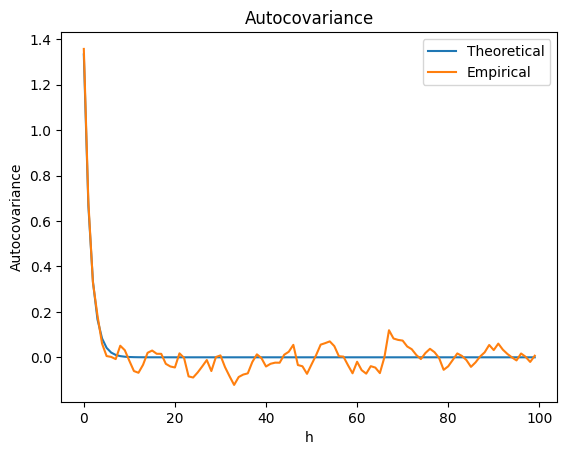

In [12]:
T = 1000
h = 100 # lag
mu, sigma = 0, 1
a = 1
K = T-1

Xt = generate_data_Xt2(T, mu, sigma, a, K)

theoretical_mean = a
theoretical_autocovariance = [(sigma**2) * 4/3 * (1/2)**lag for lag in range(h)]
empirical_mean = np.mean(Xt)
empirical_autocovariance = calculate_autocovariance(Xt, h)

print("theoretical_mean = ",theoretical_mean)
print("empirical_mean = ",empirical_mean)

plt.plot(theoretical_autocovariance, label='Theoretical')
plt.plot(empirical_autocovariance, label='Empirical')
plt.legend()
plt.xlabel('h')
plt.ylabel('Autocovariance')
plt.title("Autocovariance")
plt.show()


Run 100 times to plot the emprical means, we find that all the emprical means are very close to theoretical mean.

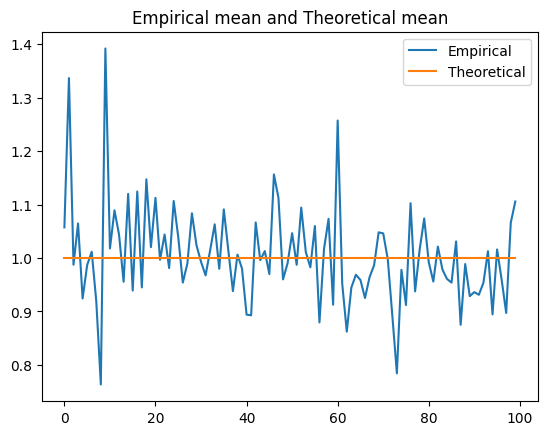

In [13]:
empirical_times = 100
empirical_means = []
for i in range(empirical_times):
    T = np.random.randint(100,1000)
    Xt = generate_data_Xt2(T, mu, sigma, a, T-1)
    empirical_means.append(np.mean(Xt))
    
plt.plot(empirical_means, label='Empirical')
plt.plot([theoretical_mean]*empirical_times, label='Theoretical')
plt.title("Empirical mean and Theoretical mean")
plt.legend()
plt.show()

4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.

/var/folders/4v/n41dv2b1147ds406__7xy7zm0000gn/T/ipykernel_45358/3605775058.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gamma = np.sum((theoretical_autocovariance[item] - empirical_autocovariance[item])**2 for item in range(len(theoretical_autocovariance)))


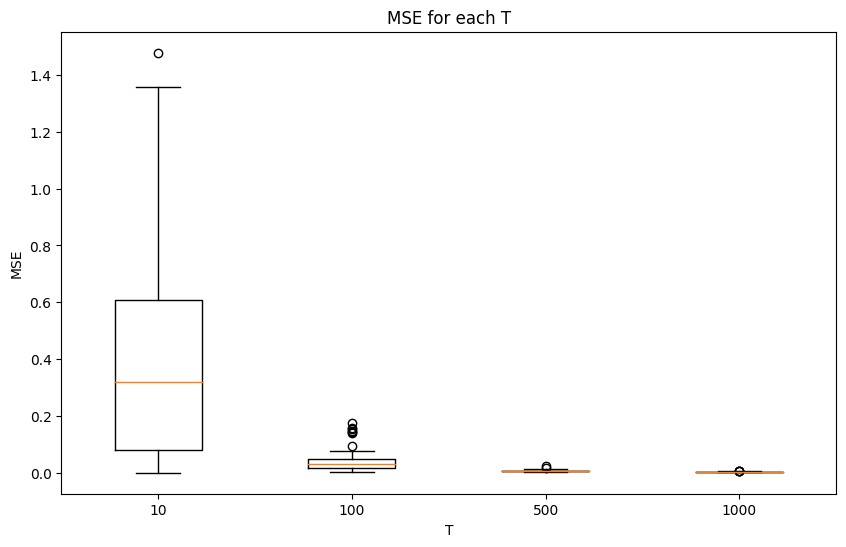

In [14]:
T_values = [10, 100, 500, 1000]
h_values = [1, 10, 50, 100]
num_draws = 100

mse_autocovariance = []

for idx in range(4):
    mse_draws = []
    T = T_values[idx]
    h = h_values[idx]
    K = T-1
    theoretical_autocovariance = [(sigma**2) * 4/3 * (1/2)**lag for lag in range(h)]

    for _ in range(num_draws):
        X = generate_data_Xt2(T, mu, sigma, a, K)
        empirical_autocovariance = calculate_autocovariance(X,h)
        gamma = np.sum((theoretical_autocovariance[item] - empirical_autocovariance[item])**2 for item in range(len(theoretical_autocovariance)))
        mse = gamma/len(theoretical_autocovariance)
        mse_draws.append(mse)

    mse_autocovariance.append(mse_draws)

# plot boxplot for each T
plt.figure(figsize=(10, 6))
plt.boxplot(mse_autocovariance)
plt.xticks([1, 2, 3, 4], T_values)
plt.title("MSE for each T")
plt.xlabel("T")
plt.ylabel("MSE")
plt.show()

According to the boxplot, we find that the error is going to be smaller with the larger value of T, which means more times for empircal calculations could less the error.